# Syllabus

Introduce the practical skills for data IO and manipulation

*  Python基本数据类型和操作回顾
*  Python环境下数据分析的基础：Numpy & Pandas






## Introduction to [Colab](https://colab.research.google.com/)

![alt text](https://cdn-images-1.medium.com/max/1000/1*7XLisHAnGGnflIYyqQja8Q.jpeg)

Google和Jupyter的合作项目， 可以看作是在线版的Jupyter Notebook。

优点
*   跨平台，只要有Chrome和Google Drive 帐号，就可以在线用Python做数据分析，代码实时保存在Google Drive。甚至可以在chromebook和tablet上用Colab。无需担心繁琐的Python环境配置和包安装。
*  Colab预先加载了常用包。如果需要，也可以临时安装其他包，安装命令非常简单。 
*  强大的Data IO，支持从本地和Google Drive读取和上传数据。
* 完全免费，包括免费使用Google的GPU，方便Deep Learning. 

缺点
* 不支持某些widgets，因此不支持某些interative visualization(比如 gmaps)


In [0]:
#@title Import packages
import numpy as np, pandas as pd
from matplotlib import pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels as sm
import seaborn as sns
import sklearn
import tensorflow as tf
from __future__ import division # for Python 2.x

import warnings
warnings.filterwarnings('ignore')

In [0]:
#@title Install packages
!pip install bokeh

    100% |████████████████████████████████| 16.1MB 2.0MB/s 
  Running setup.py bdist_wheel for bokeh ... - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/04/dc/69/0fe79e7fa6a44f344d5be532011ff43a362ed60060d82589be
Successfully built bokeh


# Numpy

## Python基本数据类型和操作回顾

基本数据类型
* Lists, Dictionaries, Sets, Tuples, Functions
* Numpy: Arrays, Array indexing, Datatypes, Array math


### Lists

In [2]:
xs = [] # Intialize an empty list
xs = [3, 1, 2]   # Create a list
print(xs[-1])     # Negative indices count from the end of the list; prints "2"
print(xs[:-1]) # vs xs[-1]

2
[3, 1]


In [3]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [4]:
xs.append('bar') # Add a new element to the end of the list
print(xs)

[3, 1, 'foo', 'bar']


In [5]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

bar [3, 1, 'foo']


#### Slicing

In [6]:
nums = np.arange(5)  # range is a built-in function that creates a list of integers
print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); 
print(nums[2:])     # Get a slice from index 2 to the end; 
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); 
print(nums[:])      # Get a slice of the whole list; 
print(nums[:-1])    # Slice indices can be negative;
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Print "[0, 1, 8, 9, 4]"

[0 1 2 3 4]
[2 3]
[2 3 4]
[0 1]
[0 1 2 3 4]
[0 1 2 3]
[0 1 8 9 4]


#### Looping

In [7]:
# Basic loop
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)
    
# enumerate, if you need both element index and element
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals, 1):
    print("#%d:%s" % (idx, animal))

cat
dog
monkey
#1:cat
#2:dog
#3:monkey


In [8]:
# List comprehension:
# 例子：如果是偶数，则平方；奇数不变
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 if x % 2 == 0 else x for x in nums]
print(even_squares)


[0, 1, 4, 3, 16]


### Dictionary
{key: value} pair

In [9]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [10]:
# Create dictionary using dictionary comprehension
dic_list=np.arange(5)
dic_examp={x:x**2 if x % 2 == 0 else x for x in dic_list}
print(dic_examp)

{0: 0, 1: 1, 2: 4, 3: 3, 4: 16}


In [11]:
# 遍历dictionary using key
for animal in d:
  feature=d[animal]
  print("%s is %s" % (animal,feature))
  
# 遍历dictionary using key,value pair
for animal,feature in d.items():
  print("%s is %s" % (animal, feature))


cat is cute
dog is furry
cat is cute
dog is furry


## Numpy
Highly efficient **array** manipulation tool. Widely used across tons of Python scientific packages, including Sklearn and Tensorflow


### 创建array

In [12]:
# create array from lists and basic features
a = np.array([[1,2,3],[4,5,6]])
print(a)
print(a.shape)

# create "empty" array
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

b = np.ones((2,2))   # Create an array of all ones
print(b)

c = np.full((2,2), 7) # Create a constant array
print(c) 

d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1 2 3]
 [4 5 6]]
(2, 3)
[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]


### Slicing

In [13]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
print(a)
b = a[:2, 1:3] # 半闭半开
print(b)
print(a[1,1]) # access single cell

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3]
 [6 7]]
6


In [14]:
# 冒号: 在索引中的用法
'''
单个冒号 表示全选；双冒号， 开始和结束
'''
a=np.arange(12)
a[::2]

array([ 0,  2,  4,  6,  8, 10])

In [15]:
# return a between 5 and 10
a_idx=(a>=5)&(a<=10)
print(a_idx)
print(a[a_idx])

# or just do it in a single statement
print(a[(a>=5)&(a<=10)])

[False False False False False  True  True  True  True  True  True False]
[ 5  6  7  8  9 10]
[ 5  6  7  8  9 10]


### 数学运算

In [16]:
# element-wise：+, -, *, / 和一般数据类型的一样，但是前提是two arrays have the same shape.
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = a+1
# Element wise sum:
print(a)
print(b)

a+b
print(a+b)
np.add(a,b)
print(np.add(a,b))
# Element wise difference:
a-b

# Matrix multiply: np.dot
print(np.dot(a,b.transpose())) # 3x4, 4x3
print(a.dot(b.transpose()))

# row, column based calculation
x = np.array([[1,2],[3,4]])
print(x)
print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"



[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]]
[[ 3  5  7  9]
 [11 13 15 17]
 [19 21 23 25]]
[[ 3  5  7  9]
 [11 13 15 17]
 [19 21 23 25]]
[[ 40  80 120]
 [ 96 200 304]
 [152 320 488]]
[[ 40  80 120]
 [ 96 200 304]
 [152 320 488]]
[[1 2]
 [3 4]]
10
[4 6]
[3 7]


In [17]:
# Broadcasting
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [18]:
# Comparison: element-wise

a = np.array([1, 2 ,3, 4])
b = np.array([4, 2 ,2, 4])

print(a==b)

# Comparison: array-wise
np.array_equal(a,b)


[False  True False  True]


False

In [19]:
# 求极值
x = np.array([[1,2],[3,4]])

print(x.max())             # 计算所有元素的最大值；结果是"4"
print(x.min())             # 计算所有元素的最小值；结果是"1"
print(x.argmax())          # 返回最大值索引；结果是"3"
print(x.argmin()) 

4
1
3
0


### Optional: 维度操作, 以CNN为例

In [20]:
# Array Flatten:
a = np.array([[1,2,3],[4,5,6]])  # 2x3
print(a.flatten())

[1 2 3 4 5 6]


In [21]:
# reshape function
x = np.array([1,2,3])
y = np.array([4,5])
print(x)
print(y)
print(np.reshape(x,(3,1)))
print(np.reshape(x,(3,1))*y)

[1 2 3]
[4 5]
[[1]
 [2]
 [3]]
[[ 4  5]
 [ 8 10]
 [12 15]]


In [22]:
np.reshape(x,(-1,1)) # -1 means its unknown dimension and we allow numpy to figure out.

array([[1],
       [2],
       [3]])

Use CNN as example!![alt text](https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png)

![alt text](https://pic1.zhimg.com/v2-6428cf505ac1e9e1cf462e1ec8fe9a68_b.gif) <br>
same padding, new dimension: orginal dimension - padding +1. <br>
可以有多个卷积核进行卷积


(28, 28)
(60000, 28, 28)


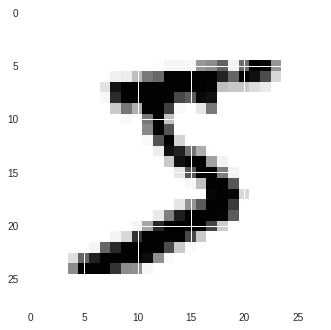

In [0]:
## Convolutional neural network, from numpy shape perspective
from keras.datasets import mnist


#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#plot the first image in the dataset
plt.imshow(X_train[0])

#check image shape
print(X_train[0].shape)

# check training dataset shape
print(X_train.shape)

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1) # 1 表示这个图片是greyscale
X_test = X_test.reshape(10000,28,28,1)

# convert y variable
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) # 第一个conv层输出64个features
model.add(Conv2D(32, kernel_size=3, activation='relu')) # 第二个conv层输出32个feature
model.add(Flatten()) # flatten layer: between conv layer and dense/output layer, converting features to 1d array
model.add(Dense(10, activation='softmax')) #softmax: link the probability to categories

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3) # 

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 211s 4ms/step - loss: 7.0312 - acc: 0.5585 - val_loss: 5.4697 - val_acc: 0.6575
Epoch 2/3
60000/60000 [==============================] - 216s 4ms/step - loss: 5.4611 - acc: 0.6593 - val_loss: 5.2975 - val_acc: 0.6704
Epoch 3/3
60000/60000 [==============================] - 215s 4ms/step - loss: 5.4448 - acc: 0.6615 - val_loss: 5.3693 - val_acc: 0.6661


In [0]:
# 合并
A = np.array([1,1,1])
B = np.array([2,2,2])

# 在竖直方向上叠加数组A,B
# 结果如下
# [[1 1 1]
#  [2 2 2]]
print(np.vstack((A,B)))

# 在水平方向上叠加数组A,B
# 结果如下
# [1 1 1 2 2 2]
print(np.hstack((A,B)))

[[1 1 1]
 [2 2 2]]
[1 1 1 2 2 2]


### 生成随机数

In [23]:
# np.random.choice: 从一个pool里面随机抽样
np.random.seed(9) # 保证随机数的重复性
np.random.choice(np.arange(100),size=[10,3],replace=True)

array([[92, 54, 56],
       [22, 65, 22],
       [52, 59, 40],
       [91, 33, 93],
       [92,  0, 60],
       [59, 88, 74],
       [56, 93, 62],
       [12, 18, 86],
       [56,  1, 56],
       [99, 11, 37]])

In [0]:
# 随机数实例: 随机抽取70%的数据作为training data, 剩下作为testing
dt_rd_3=sns.load_dataset("iris") # [150,3]
np.random.seed(10)
rd_index_all=np.arange(dt_rd_3.shape[0])
num_training=int(np.floor(dt_rd_3.shape[0]*0.7))
rd_index_train=np.random.choice(rd_index_all,num_training,replace=False)
rd_index_test=np.delete(rd_index_all,rd_index_train) # test_index
dt_rd_3_train=dt_rd_3.iloc[rd_index_train]
dt_rd_3_test=dt_rd_3.iloc[rd_index_test]
#有时候需要reset_index()

In [25]:
print("training dataset has {} rows, and testing set has {} rows".format(dt_rd_3_train.shape[0],\
                                                                        dt_rd_3_test.shape[0]))


training dataset has 105 rows, and testing set has 45 rows


In [0]:
# 还可以用random.shuffle来split training and testing dataset
np.random.shuffle(rd_index_all)
dt_rd_3.index=rd_index_all
dt_rd_3_train=dt_rd_3.iloc[:num_training]
dt_rd_3_test=dt_rd_3.iloc[num_training:]

In [27]:
print("training dataset has {} rows, and testing set has {} rows".format(dt_rd_3_train.shape[0],\
                                                                        dt_rd_3_test.shape[0]))


training dataset has 105 rows, and testing set has 45 rows


In [0]:
#还可以用sklearn来生成training and testing data
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), np.arange(5)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [29]:
X_train, y_train

(array([[8, 9],
        [4, 5],
        [0, 1],
        [6, 7]]), array([4, 2, 0, 3]))

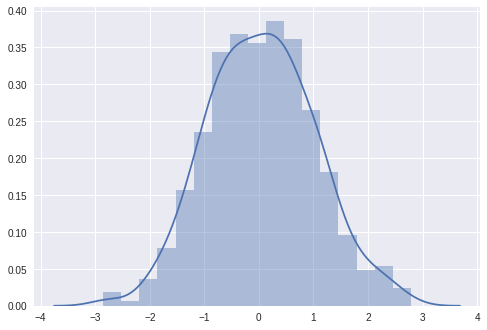

In [30]:
# 抽取分布: random samples from a standard normal distribution
dt_rd_0=np.random.randn(500)
sns.distplot(dt_rd_0)

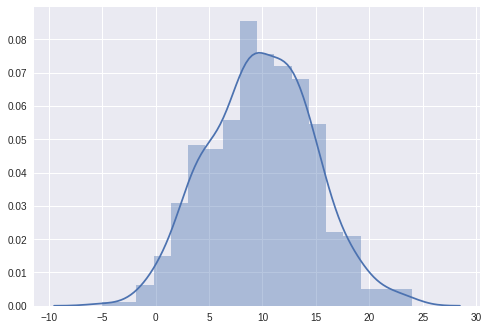

In [31]:
# 抽取分布：random samples from a normal distribution, with mean=10, SD=5
dt_rd_1=np.random.normal(10,5,500)
sns.distplot(dt_rd_1)


In [0]:
# if you are interested in how array works in Tensorflow, here is a quick link
# https://cs224d.stanford.edu/lectures/CS224d-Lecture7.pdf

# Pandas
Pandas库建立于Numpy之上,是Python中最常用最有效的数据处理工具之一,它和 Numpy,Matplotlib 一起构成了一个 Python 数据探索和分析的强大基础. <br>
Pandas 基于两种数据类型，series 和 dataframe. series 是一种一维的数据类型，其中的每个元素都有各自的标签。如果你之前看过这个系列关于 Numpy 的推文，你可以把它当作一个由带标签的元素组成的 numpy 数组.标签可以是数字或者字符。

dataframe 是一个二维的、表格型的数据结构。Pandas 的 dataframe 可以储存许多不同类型的数据，并且每个轴都有标签。你可以把它当作一个 series 的字典。
<br> http://codingpy.com/article/a-quick-intro-to-pandas/


## 数据的读取和生成

In [0]:
# Do Not Run 
#从本地读取数据， 注意以下只是一个举例，路径和文件都是虚拟的，所以不要跑这个cell。
# 在正式读取的时候， 请在read_csv内填写完整路径。
import pandas as pd
# read data from local CSV
pd.read_csv("../data_folder/data.csv", sep=',', header=0,encoding = 'gbk')


In [0]:
# read data from URL, run this cell before run the cells below. 
url="http://data.defra.gov.uk/statistics_2015/env/water/uk_rain_2014.csv"
df=pd.read_csv(url) # a dataframes


In [0]:
# Do Not Run
# Read data from Google Drive(麻烦)
# 不要跑这个cell， 因为这个cell里面是一个link，点击这个link参照里面的说明从drive里读数据。
https://colab.sandbox.google.com/notebooks/io.ipynb

In [33]:
# Read data from Google Drive(简单):only when the file size is not large
# step 1: change your csv file in Drive as Anyone with the link can view
file_id='13WIX0uQaA4ROvsfVjqPUwbmyW07XMc9S'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df = pd.read_csv(csv_url)
df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [0]:
# 生成Dataframe from lists.
# df=pd.DataFrame({'list_x':x,'list_y':y})

# Initialize a list and then dynamically insert values
df=pd.DataFrame(columns=['C1','C2','C3'])
row=['a','b','c']
df.loc[len(df)]=row


In [0]:
# Do Not Run
# Save dataframe to CSV and save to local machine
df.to_csv('df.csv', index=False)
from google.colab import files
files.download('df.csv')

## 基本Slicing

In [39]:
# Dataframe description, make sure you run cell 38 before you run this cell. 
df.head()

,Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


In [41]:
# Dataframe description
df.describe()

,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1129.000000,5019.181818,325.363636,7926.545455,237.484848,2439.757576
std,101.900074,658.587762,69.995008,1692.800049,66.167931,1025.914106
min,856.000000,3479.000000,206.000000,4578.000000,103.000000,1078.000000
25%,1053.000000,4506.000000,268.000000,6690.000000,193.000000,1797.000000
50%,1139.000000,5112.000000,309.000000,7630.000000,229.000000,2142.000000
75%,1182.000000,5497.000000,360.000000,8905.000000,280.000000,2959.000000
max,1387.000000,6391.000000,484.000000,11486.000000,379.000000,5261.000000


In [0]:
# 返回每个列的数值类型
df.dtypes

Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined            object
Balance               float64
dtype: object

In [40]:
# change the column name
df.columns = ['water_year','rain_octsep', 'outflow_octsep',
              'rain_decfeb', 'outflow_decfeb', 'rain_junaug', 'outflow_junaug']
df.head(2)

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936


In [42]:
# slicing: rain_octsep<=993 and rain_decfeb>=300 的所有行
df[(df['rain_octsep']<=993)&(df['rain_decfeb']>=300)] # 内部的判别式子， return bool


,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
3,1983/84,993,4265,391,8905,141,1078
8,1988/89,976,4330,309,6465,200,1440


In [43]:
# slicing: rain_octsep<=993 and rain_decfeb>=300的数量
df[(df['rain_octsep']<=993)&(df['rain_decfeb']>=300)].shape[0]

2

In [44]:
# slicing: rain_octsep<=993 and rain_decfeb>=300的某几列
df.loc[(df.rain_octsep<=993)&(df.rain_decfeb>=300),['water_year','rain_octsep']]

# 或者用iloc can only use integer
my_index=list(np.where((df.rain_octsep<=993)&(df.rain_decfeb>=300))[0]) # get the index first
df.iloc[my_index,:2]

,water_year,rain_octsep
3,1983/84,993
8,1988/89,976


In [45]:
# 如果想slice的是string， filtering by string methods
df[df.water_year.str.startswith('199')]

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
10,1990/91,1022,4418,305,7120,216,1923
11,1991/92,1151,4506,246,5493,280,2118
12,1992/93,1130,5246,308,8751,219,2551
13,1993/94,1162,5583,422,10109,193,1638
14,1994/95,1110,5370,484,11486,103,1231
15,1995/96,856,3479,245,5515,172,1439
16,1996/97,1047,4019,258,5770,256,2102
17,1997/98,1169,4953,341,7747,285,3206
18,1998/99,1268,5824,360,8771,225,2240
19,1999/00,1204,5665,417,10021,197,2166


## 复杂Slicing

### 运用函数
apply, applymap, map, lambda

In [0]:
## Applying a function to a column: apply
def base_year(year):
    base_year = year[:4]
    base_year= pd.to_datetime(base_year).year
    return base_year



In [47]:
## use lambda
base_year=lambda x: pd.to_datetime(x[:4]).year  
df['year'] = df.water_year.apply(base_year)
df.head(2)



,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
0,1980/81,1182,5408,292,7248,174,2212,1980
1,1981/82,1098,5112,257,7316,242,1936,1981


In [48]:
# 对某些列进行操作: apply
df[['outflow_octsep','rain_decfeb']].apply(sum)

outflow_octsep    165633
rain_decfeb        10737
dtype: int64

In [0]:
# 对整个dataframe运用函数：applymap, 注意用数据类型
func = lambda x: x+2
df.applymap(func)

In [0]:
# groupby: similar to SQL groupby
df.groupby(df.year // 10 *10,as_index=False)['rain_octsep','outflow_octsep','rain_decfeb'].max()

In [0]:
# groupby multiple columns
df.groupby([df.year // 10 * 10, df.rain_octsep // 1000 * 1000],as_index=False)[['outflow_octsep','outflow_decfeb', 'outflow_junaug']].mean()

In [0]:
# 每个十年，最大的rain_octsep,outflow_octsep,rain_decfeb: groupby+apply(lambda)

df.groupby(df.year // 10 *10)['rain_octsep','outflow_octsep','rain_decfeb'].apply(lambda x: np.max(x,axis=0)).reset_index() # same result as first groupby example

### Dataframe Join


In [0]:
# 两个dataframe join or concatenate
df_right=pd.DataFrame({'year':np.arange(1980,1990),'rain_cn':np.arange(800,810)})
df_right.loc[df_right.shape[0]]=[900,2018] # 手动加入一个outlier年份
# 注意虽然我们在声明dataframe的时候， 先输入year， 再输入rain_cn, 但是最终
# DF会自动order

In [50]:
df_right

,rain_cn,year
0,800,1980
1,801,1981
2,802,1982
3,803,1983
4,804,1984
5,805,1985
6,806,1986
7,807,1987
8,808,1988
9,809,1989


In [0]:
# SQL like join:
df_join=pd.merge(df, df_right, left_on='year',right_on='year',how='inner')

In [52]:
df_join

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year,rain_cn
0,1980/81,1182,5408,292,7248,174,2212,1980,800
1,1981/82,1098,5112,257,7316,242,1936,1981,801
2,1982/83,1156,5701,330,8567,124,1802,1982,802
3,1983/84,993,4265,391,8905,141,1078,1983,803
4,1984/85,1182,5364,217,5813,343,4313,1984,804
5,1985/86,1027,4991,304,7951,229,2595,1985,805
6,1986/87,1151,5196,295,7593,267,2826,1986,806
7,1987/88,1210,5572,343,8456,294,3154,1987,807
8,1988/89,976,4330,309,6465,200,1440,1988,808
9,1989/90,1130,4973,470,10520,209,1740,1989,809


In [53]:
# left join
df_left_join=pd.merge(df, df_right, left_on='year',right_on='year', how='left') # 不要省略left_on, right_on
df_left_join.tail()

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year,rain_cn
28,2008/09,1139,4941,268,6690,323,3189,2008,NaN
29,2009/10,1103,4738,255,6435,244,1958,2009,NaN
30,2010/11,1053,4521,265,6593,267,2885,2010,NaN
31,2011/12,1285,5500,339,7630,379,5261,2011,NaN
32,2012/13,1090,5329,350,9615,187,1797,2012,NaN


### pandasql

In [55]:
#@title 安装pandasql包
!pip install pandasql


    100% |████████████████████████████████| 5.7MB 5.0MB/s 
  Running setup.py bdist_wheel for pandasql ... - done
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
  Running setup.py bdist_wheel for sqlalchemy ... - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/86/c8/99/8d6049a373070743a79ada4cf9798f8130cc8e2dfcd66e0e9d
Successfully built pandasql sqlalchemy


In [56]:
#@title pandasql实例
from pandasql import sqldf, load_meat, load_births
pdq = lambda q: sqldf(q, globals())
print(pdq("SELECT * FROM df LIMIT 10;").head())


  water_year  rain_octsep  outflow_octsep  rain_decfeb  outflow_decfeb  \
0    1980/81         1182            5408          292            7248   
1    1981/82         1098            5112          257            7316   
2    1982/83         1156            5701          330            8567   
3    1983/84          993            4265          391            8905   
4    1984/85         1182            5364          217            5813   

   rain_junaug  outflow_junaug  year  
0          174            2212  1980  
1          242            1936  1981  
2          124            1802  1982  
3          141            1078  1983  
4          343            4313  1984  


In [57]:
# 独立查询语句
q_state='''
select count(distinct case when outflow_decfeb>=outflow_octsep then year end) as target_year
from df
where year between 1980 and 1990;
'''
pdq(q_state)

,target_year
0,11


## 数据质量检查


*   重复值
*   缺失值
*   异常值



In [0]:
#@title 重复值

In [0]:
df.head()

In [0]:
# 检查某个列是否有重复值
df.iloc[np.where(df.rain_octsep.duplicated())] # 显示rain_octsep重复值所在的行

In [0]:
# create a duplicated row as the last row
df_dup=df
df_dup.loc[len(df_dup)]=df_dup.iloc[0]
df_dup.iloc[[0,-1],] # 现实第一行和最后一行

In [0]:
# 检查有没有重复行
df_dup.duplicated()

In [0]:
# 删除重复行
df_dedup=df_dup.drop_duplicates()
df_dedup.iloc[[0,-1],]

In [0]:
#@title 缺失值

In [0]:
# 检测缺失值的行: return rows have NaN
idx_row_nan=pd.isnull(df_left_join).any(axis=1) # 返回 bool value
df_left_join.loc[idx_row_nan].head()


In [0]:
# 检查缺失列
pd.isnull(df_left_join).any(axis=0)


In [0]:
# 选择没有NaN的行
df_left_join.loc[-idx_row_nan] # bool值可以用来做反选

In [0]:
# or 直接把NaN所在的行删掉
df_left_join_0=df_left_join
df_left_join_0.dropna(axis='rows') # axis = 0 or 1 is deprecated for dropna command

In [0]:
# Imputation: replace NaN with 0
df_left_join_1=df_left_join
df_left_join_1.fillna(0).tail(5) # 也可以换成其他0以外的其他值， 包括string.

In [0]:
# Replace the NaN with column mean
df_left_join_1=df_left_join
df_left_join_1['rain_cn']=df_left_join_1['rain_cn'].fillna((df_left_join_1['rain_cn'].mean()), inplace=False)
df_left_join_1['rain_cn'].tail(5)

In [0]:
#@title 异常值

![alt text](https://www.mathsisfun.com/data/images/outlier.svg)<br>
![alt text](https://statistics.laerd.com/statistical-guides/img/pearson-6.png)

In [0]:
# Simulate data
dt_outlier=np.concatenate([np.random.normal(0,1,100),np.random.normal(8,1,10)])
sns.set_style('whitegrid')
sns.distplot(dt_outlier)

异常值检测： Boxplot  <br>
Interquartile Range(IQR):
IQR= Upper Quantile(Q3) - Lower Quartile(Q1) <br>
Lower Limit = Q1 - 1.5 IQR <br>
Upper Limit = Q3 + 1.5 IQR <br>
![alt text](https://i.stack.imgur.com/mpbTr.gif)


In [0]:
sns.boxplot(dt_outlier,orient='v')

In [0]:
# 定义一个function remove outlier using IQR
def iqr_outlier_rm(dt_input):
  lq,uq=np.percentile(dt_input,[25,75])
  lower_l=lq - 1.5*(uq-lq)
  upper_l=uq + 1.5*(uq-lq)
  return dt_input[(dt_input >=lower_l)&(dt_input<=upper_l)]
  
dt_outlier_ws=iqr_outlier_rm(dt_outlier)
sns.boxplot(dt_outlier_ws,orient='v')

Winsorizing 异常值 <br>
set all outliers to a specified percentile of the data; for example, a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile.  It's not trimming data, just the extreme values are instead replaced by certain percentiles

In [0]:
dt_outlier_wins=stats.mstats.winsorize(dt_outlier, limits =[None,0.1]) # 10% on one side
fig=plt.figure()
plt.subplot(121)
sns.boxplot(dt_outlier,orient='v')
plt.subplot(122)
sns.boxplot(dt_outlier_wins,orient='v')


## Dataframe 快速作图

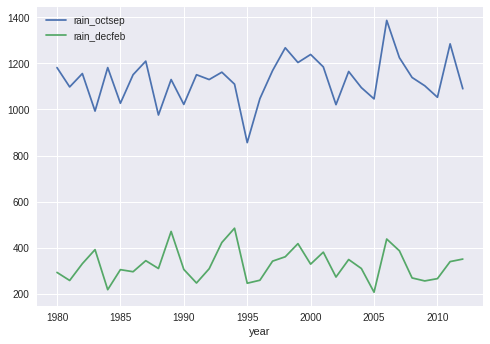

In [58]:
# https://pandas.pydata.org/pandas-docs/stable/visualization.html
df.plot(x='year',y=['rain_octsep', 'rain_decfeb'])